TODO:
- [ ]

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import astropy
from scipy.interpolate import interp1d

dir = ''

In [2]:
# read in test data_eV from CR Flux - Gaisser et al 2016.csv
data = np.loadtxt(f'CR Flux - Gaisser et al 2016.csv', delimiter=',', skiprows=1)
data = data[np.argsort(data[:, 0])]
# divide the x and y data_eV by 10 because the scale was off in the point getting site
data[:, 0] /= 10
data[:, 1] /= 10

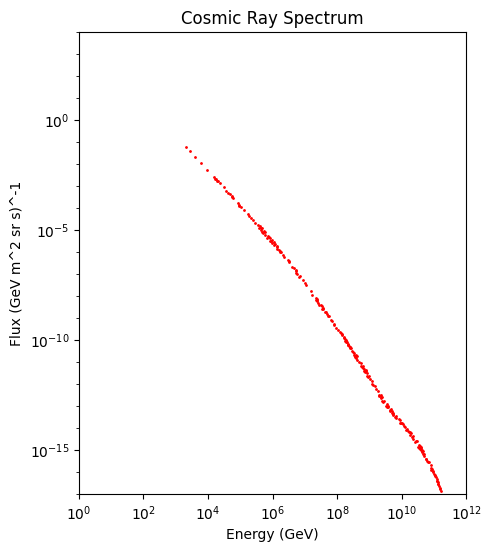

In [3]:
# plot the data_eV
plt.figure(figsize=(5, 6))
plt.scatter(data[:, 0], data[:, 1], label='data_eV', color='red', s=1)
# plt.plot(E, flux, label='Broken Power Law', color='blue')
plt.xlim(1e1,1e12)
plt.ylim(1e-17,1e4)
plt.xscale('log')
plt.yscale('log')

# import matplotlib.ticker as ticker

ax = plt.gca()

# X axis: major ticks at 10^0, 10^2, ..., 10^12
ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[1.0], numticks=13))
ax.set_xticks([10**i for i in range(0, 13, 2)])  # explicitly force 10^0, 10^2, ..., 10^12

# Y axis: major ticks only at 10^0, 10^-5, 10^-10, 10^-15
ax.set_yscale('log')
ax.set_yticks([1e0, 1e-5, 1e-10, 1e-15])

# Y axis: minor ticks at the intermediate decades
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 1.0), numticks=100))

# (Optional) turn off minor tick labels if you only want tick marks
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.xlabel('Energy (GeV)')
# plt.ylabel('Flux (m^-2 s^-1 sr^-1 GeV^-1)')
plt.ylabel('Flux (GeV m^2 sr s)^-1')
# plt.ylabel('Flux (GeV cm^-2 sr^-1 s^-1)')
plt.title('Cosmic Ray Spectrum')

plt.savefig(f'Cosmic Ray Spectrum - Reconstructed.png', dpi=300)

In [4]:
# convert the Energy from GeV to eV
# data_eV[:, 0] *= 1e9  # GeV to eV

# fill data_eV with the converted values
data_eV = data.copy()
data_eV[:, 0] *= 1e9  # GeV to eV


# convert Flux from (GeV cm^-2 sr^-1 s^-1) to (GeV m^-2 sr^-1 s^-1)
# data_eV[:, 1] *= 1e-4  # cm^-2 to m^-2


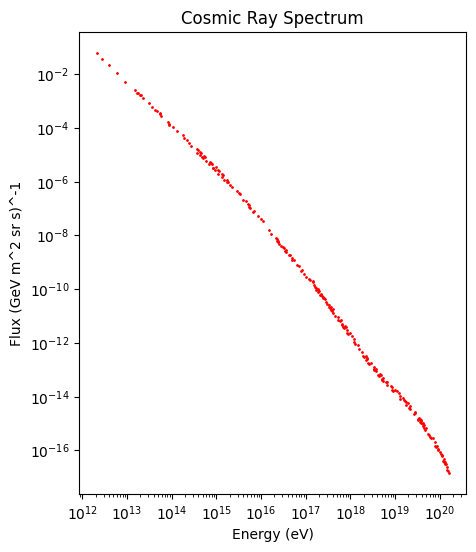

In [5]:
# plot the data_eV
plt.figure(figsize=(5, 6))
plt.scatter(data_eV[:, 0], data_eV[:, 1], label='data_eV', color='red', s=1)
plt.xscale('log')
plt.yscale('log')
ax = plt.gca()
plt.xlabel('Energy (eV)')
plt.ylabel('Flux (GeV m^2 sr s)^-1')
plt.title('Cosmic Ray Spectrum')
plt.savefig(f'Cosmic Ray Spectrum - Reconstructed - eV.png', dpi=300)

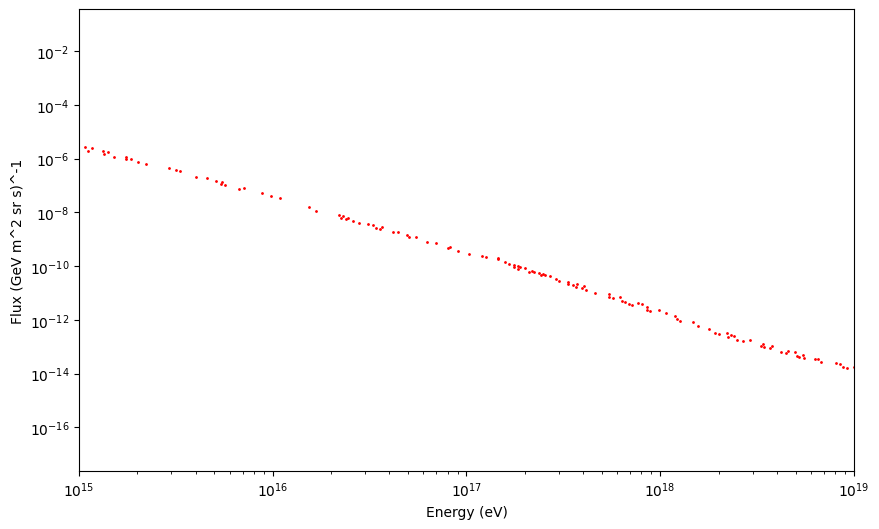

In [6]:
# plot the data_eV from 10^15 to 10^12 eV
plt.figure(figsize=(10, 6))
plt.scatter(data_eV[:, 0], data_eV[:, 1], label='data_eV', color='red', s=1)
# plt.plot(E, flux, label='Broken Power Law', color='blue')
plt.xlim(1e15, 1e19)
# plt.ylim(1e-6,1e4)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Energy (eV)')
plt.ylabel('Flux (GeV m^2 sr s)^-1')
plt.savefig(f'Cosmic Ray Spectrum - Cropped Spectrum.png', dpi=300)

In [7]:
# for any duplicate x values, average the y values
unique_x = np.unique(data_eV[:, 0])
averaged_data = []
for x in unique_x:
    y_values = data_eV[data_eV[:, 0] == x, 1]
    averaged_y = np.mean(y_values)
    averaged_data.append([x, averaged_y])
data_eV = np.array(averaged_data)
# interpolate the data_eV to get a smooth curve
interp_func_flux = interp1d(data_eV[:, 0], data_eV[:, 1], kind='cubic', fill_value="extrapolate")
x_interp_flux = np.logspace(np.log10(min(data_eV[:, 0])), np.log10(max(data_eV[:, 0])), 100)
y_interp_flux = interp_func_flux(x_interp_flux)

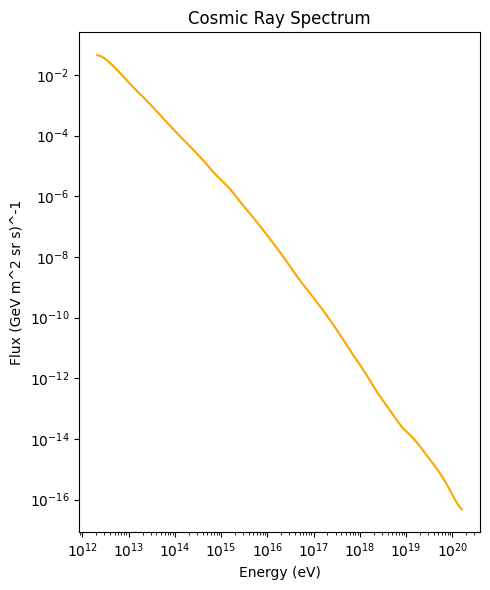

In [8]:
# smooth the curve using gaussian filter
from scipy.ndimage import gaussian_filter1d
y_smooth = gaussian_filter1d(y_interp_flux, sigma=2)
# plot the smoothed data_eV
plt.figure(figsize=(5, 6))
# plt.plot(data_eV[:, 0], data_eV[:, 1], 'o', label='Original data_eV', color='red', markersize=2)
plt.plot(x_interp_flux, y_smooth, label='Smoothed data_eV', color='orange')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e4,.5*1e12)
plt.xlabel('Energy (eV)')
plt.ylabel('Flux (GeV m^2 sr s)^-1')
plt.title('Cosmic Ray Spectrum')
plt.tight_layout()

# plt.legend()
plt.savefig(f'Smoothed Cosmic Ray Spectrum - eV.png', dpi=300)

# Read in Enrique's Trigger Efficiency

In [9]:
# original table values - for shower energy (not primary cosmic ray energy)
#     [16.0, 0.0204],
#     [16.5, 0.1082],
#     [17.0, 0.1671],
#     [17.5, 0.2144],
#     [18.0, 0.2460],
#     [18.5, 0.2849],
#     [19.0, 0.2938]
# ])

trigger_efficiency = np.array([  # scaled by a factor of 10 to account for the difference between shower energy and primary cosmic ray energy
    # i.e. a 10^18.5 eV primary cosmic ray produces a 10^17.5 eV shower (at least very roughly as a starting point)
    [17.0, 0.0204],
    [17.5, 0.1082],
    [18.0, 0.1671],
    [18.5, 0.2144],
    [19.0, 0.2460],
    [19.5, 0.2849],
    [20.0, 0.2938]
])

# interpolate the trigger efficiency to get a smooth curve
interp_func_trigger = interp1d(trigger_efficiency[:, 0], trigger_efficiency[:, 1], kind='cubic', fill_value="extrapolate")
x_trigger_eff = np.linspace(17, 20, 100)
y_trigger_eff = interp_func_trigger(x_trigger_eff)

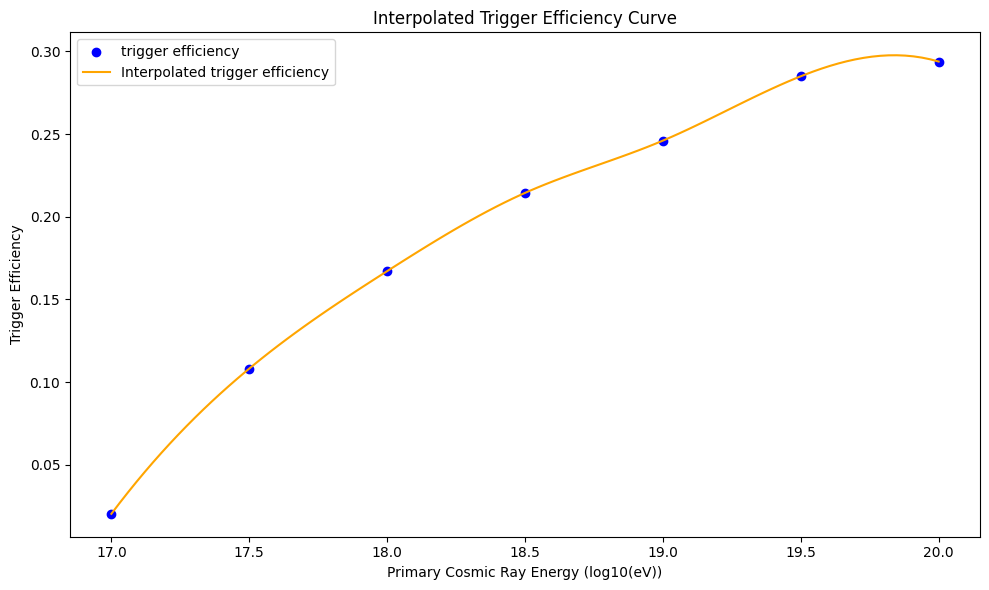

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(trigger_efficiency[:, 0], trigger_efficiency[:, 1], label='trigger efficiency', color='blue')
plt.plot(x_trigger_eff, y_trigger_eff, label='Interpolated trigger efficiency', color='orange')
plt.xlabel('Primary Cosmic Ray Energy (log10(eV))')
plt.ylabel('Trigger Efficiency')
plt.title('Interpolated Trigger Efficiency Curve')
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.savefig(f'Interpolated RNO-G Trigger Efficiency.png', dpi=300)

# Estimate the number of events detected by multiplying flux by sensitivity

TODO:
- [ ] Identify why the plot looks wrong if these cells are below the sensitivity cells
    - compare to Sensitivity.ipynb
        - there, the plot looks identical if you re-run the cell above
        - i.e. successive runs change the data
            - => so something in this notebook below the next two cells is changing the data in the same way and both notebooks should be debugged

In [11]:
# find the estimated number of events at each energy in data_eV by multiplying the sensitivity by the flux using the smoothed sensitivity curve

# then, for each energy in data_eV, find the corresponding sensitivity from the interpolated sensitivity curve
# and multiply it by the flux
estimated_events = []
# flux_x = data_eV[:, 0]
# flux_y = data_eV[:, 1]
# use the smoothed y values
flux_x = x_interp_flux
flux_y = y_smooth
# print(len(flux_x), len(flux_y))

for E, flux in zip(flux_x, flux_y):
    logE = np.log10(E)
    if logE < min(x_trigger_eff) or logE > max(x_trigger_eff):
        efficiency = 0
    else:
        efficiency = interp_func_trigger(logE)
    estimated_event = efficiency * flux
    estimated_events.append(estimated_event)
estimated_events = np.array(estimated_events)

print(f"first 5 flux_y: {flux_y[:5]}")
print(f"first 5 estimated_events: {estimated_events[:5]}")

first 5 flux_y: [0.04533418 0.04144829 0.03507715 0.02805915 0.02168862]
first 5 estimated_events: [0. 0. 0. 0. 0.]


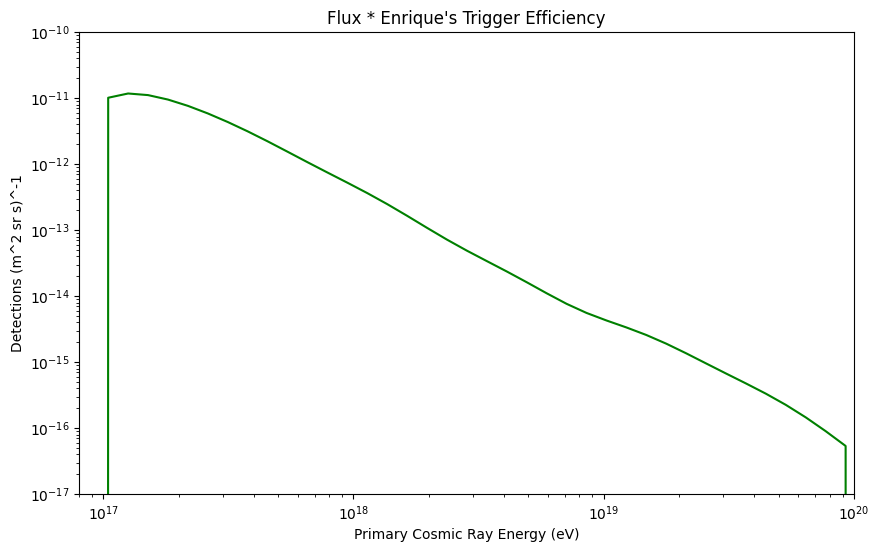

In [12]:
# plot the estimated number of events vs energy
plt.figure(figsize=(10, 6))
plt.plot(flux_x, estimated_events, label='Estimated Events', color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Primary Cosmic Ray Energy (eV)')
plt.ylabel('Detections (m^2 sr s)^-1')
plt.title('Flux * Enrique\'s Trigger Efficiency')
plt.xlim(0.8*1e17, 1e20)
plt.ylim(1e-17,1e-10)
plt.savefig(f'Flux * Enrique\'s Trigger Efficiency.png', dpi=300)

# Read in CODALEMA's detector sensitivity as a rough estimate of RNO-G's sensitivity

In [13]:
detector_sensitivity = np.array([
    [1 * 10**(16.1), 3/3626],
    [1 * 10**(16.3), 8/2130],
    [1 * 10**(16.5), 5/1119],
    [1 * 10**(16.7), 20/560],
    [1 * 10**(16.9), 45/280],
    [1 * 10**(17.1), 36/105],
    [1 * 10**(17.3), 25/49],
    [1 * 10**(17.5), 9/14],
    # [1 * 10**(17.7), 2/4],
    # [1 * 10**(17.9), 1/2]
    # [1 * 10**(17.7), 0.8],
    [1 * 10**(17.9), 0.8],
    [1 * 10**(18.1), 0.8],
    [1 * 10**(18.3), 0.8],
    [1 * 10**(18.5), 0.8],
    [1 * 10**(18.7), 0.8],
    [1 * 10**(18.9), 0.8],
    [1 * 10**(19.1), 0.8],
    [1 * 10**(19.3), 0.8],
    [1 * 10**(19.5), 0.8],
    [1 * 10**(19.7), 0.8],
    [1 * 10**(19.9), 0.8]
])

In [14]:
# interpolate the sensitivity to get a smooth curve
interp_func_sensitivity = interp1d(np.log10(detector_sensitivity[:, 0]), detector_sensitivity[:, 1], kind='cubic', fill_value="extrapolate")
x_sensitivity = np.linspace(16.1, 19.9, 100)
y_sensitivity = interp_func_sensitivity(x_sensitivity)

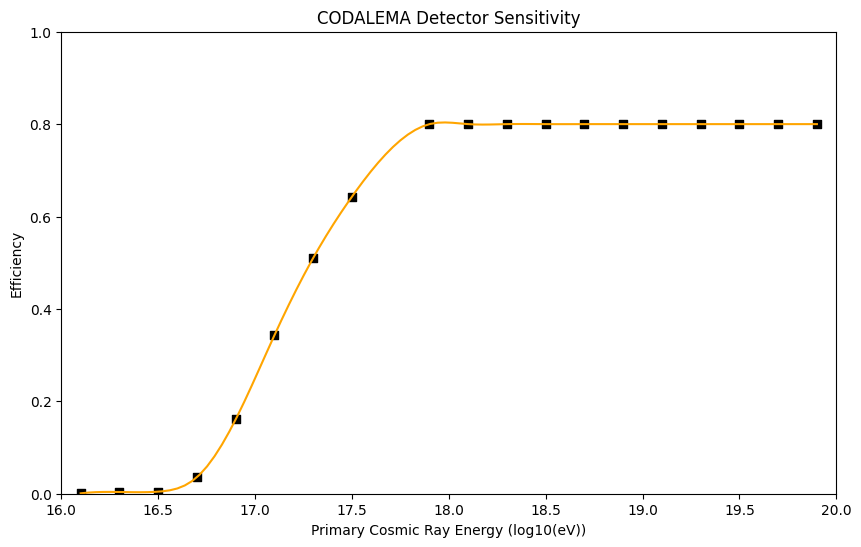

In [15]:
# plot these points
plt.figure(figsize=(10, 6))
# plt.scatter(detector_sensitivity[:, 0], detector_sensitivity[:, 1], label='CODALEMA Sensitivity', color='cyan')
# plot the log of the x values
plt.scatter(np.log10(detector_sensitivity[:, 0]), detector_sensitivity[:, 1], label='CODALEMA Sensitivity',marker='s', color='black')

plt.plot(x_sensitivity, y_sensitivity, label='Interpolated CODALEMA Sensitivity', color='orange')

# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Primary Cosmic Ray Energy (log10(eV))')
plt.ylabel('Efficiency')
plt.title('CODALEMA Detector Sensitivity')
plt.xlim(16, 20)
# set the x ticks to every 0.2
# plt.xticks(np.arange(16, 20.1, 0.2))
plt.ylim(0,1)
plt.savefig(f'Interpolated and Extrapolated CODALEMA Sensitivity.png', dpi=300)

In [ ]:
# Create a plot with three subplots: the sensitivity curve, the trigger efficiency curve, and the two multiplied together
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))
# plot sensitivity curve
ax1.plot(x_sensitivity, y_sensitivity, label='CODALEMA Sensitivity', color='orange')
ax1.set_xlabel('Primary Cosmic Ray Energy (log10(eV))')
ax1.set_ylabel('Efficiency')
ax1.set_title('CODALEMA Detector Sensitivity')
ax1.set_xlim(16, 20)
ax1.set_ylim(0,1)
ax1.legend()
# plot trigger efficiency curve
ax2.plot(x_trigger_eff, y_trigger_eff, label='RNO-G Trigger Efficiency', color='blue')
ax2.set_xlabel('Primary Cosmic Ray Energy (log10(eV))')
ax2.set_ylabel('Trigger Efficiency')
ax2.set_title('RNO-G Trigger Efficiency')
ax2.set_xlim(16, 20)
ax2.set_ylim(0,0.35)
ax2.legend()
# plot the two multiplied together
# y_sensitivity and y_trigger_eff do not start and end at the same x values, so we need to interpolate one to the other's x values
sensitivity_trigger_efficiency = y_sensitivity * interp_func_trigger(x_sensitivity)




ax3.plot(x_sensitivity, sensitivity_trigger_efficiency, label='Sensitivity * Trigger Efficiency', color='green')
ax3.set_xlabel('Primary Cosmic Ray Energy (log10(eV))')
ax3.set_ylabel('Combined Efficiency')
ax3.set_title('Combined CODALEMA Sensitivity and RNO-G Trigger Efficiency')
ax3.set_xlim(16, 20)
ax3.set_ylim(0,0.35)
ax3.legend()
plt.tight_layout()

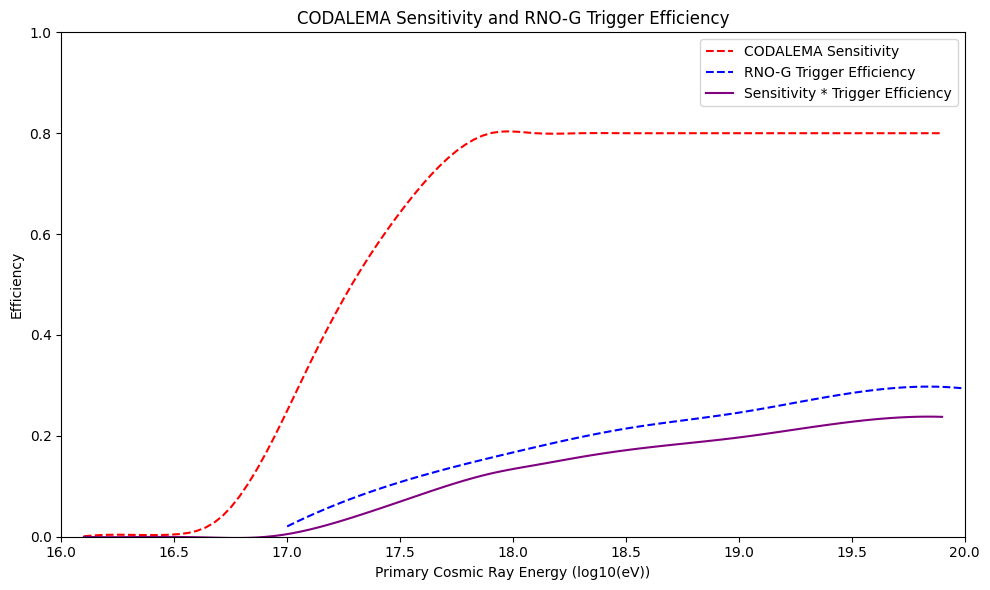

In [47]:
# plot the all on one plot
plt.figure(figsize=(10, 6))
plt.plot(x_sensitivity, y_sensitivity, label='CODALEMA Sensitivity', color='red', linestyle='--')
plt.plot(x_trigger_eff, y_trigger_eff, label='RNO-G Trigger Efficiency', color='blue', linestyle='--')
plt.plot(x_sensitivity, sensitivity_trigger_efficiency, label='Sensitivity * Trigger Efficiency', color='purple')
plt.xlabel('Primary Cosmic Ray Energy (log10(eV))')
plt.ylabel('Efficiency')
plt.title('CODALEMA Sensitivity and RNO-G Trigger Efficiency')
plt.xlim(16, 20)
plt.ylim(0,1)
# plt.ylim(0,0.25)

plt.legend()
plt.tight_layout()
plt.savefig(f'CODALEMA Sensitivity and RNO-G Trigger Efficiency - All on One Plot.png', dpi=300)

In [28]:
# print the values of all three at x = 17.75
x_value = 17.75
sensitivity_value = interp_func_sensitivity(x_value)
trigger_efficiency_value = interp_func_trigger(x_value)
combined_value = sensitivity_value * trigger_efficiency_value
print(f"At log10(E) = {x_value}:")
print(f"CODALEMA Sensitivity: {sensitivity_value}")
print(f"RNO-G Trigger Efficiency: {trigger_efficiency_value}")
print(f"Combined Sensitivity * Trigger Efficiency: {combined_value}")

At log10(E) = 17.75:
CODALEMA Sensitivity: 0.764826396650279
RNO-G Trigger Efficiency: 0.1396347098214286
Combined Sensitivity * Trigger Efficiency: 0.10679631196003055


# Estimate the number of events triggered by multiplying flux by sensitivity by trigger efficiency

In [33]:
# find the estimated number of events which the detector is sensitive to and which trigger the detector
estimated_sensitive_triggered_events = []
for E, flux in zip(flux_x, flux_y):
    logE = np.log10(E)
    if logE < min(x_sensitivity) or logE > max(x_sensitivity):
        sensitivity = 0
    if logE < min(x_trigger_eff) or logE > max(x_trigger_eff):
        efficiency = 0
    else:
        sensitivity = interp_func_sensitivity(logE)
        efficiency = interp_func_trigger(logE)
    estimated_event = sensitivity * efficiency * flux
    estimated_sensitive_triggered_events.append(estimated_event)
estimated_sensitive_triggered_events = np.array(estimated_sensitive_triggered_events)

In [34]:
# print the estimated_sensitive_triggered_events for

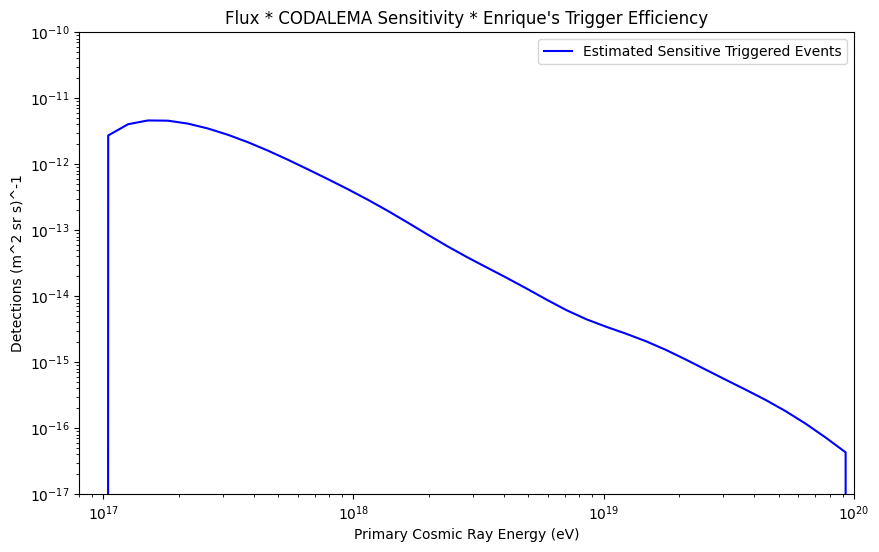

In [35]:
# plot the estimated number of events vs energy
plt.figure(figsize=(10, 6))
plt.plot(flux_x, estimated_sensitive_triggered_events, label='Estimated Sensitive Triggered Events', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Primary Cosmic Ray Energy (eV)')
plt.ylabel('Detections (m^2 sr s)^-1')
plt.title('Flux * CODALEMA Sensitivity * Enrique\'s Trigger Efficiency')
plt.xlim(0.8*1e17, 1e20)
plt.ylim(1e-17,1e-10)
plt.legend()
plt.savefig(f'Flux * CODALEMA Sensitivity * Enrique\'s Trigger Efficiency.png', dpi=300)

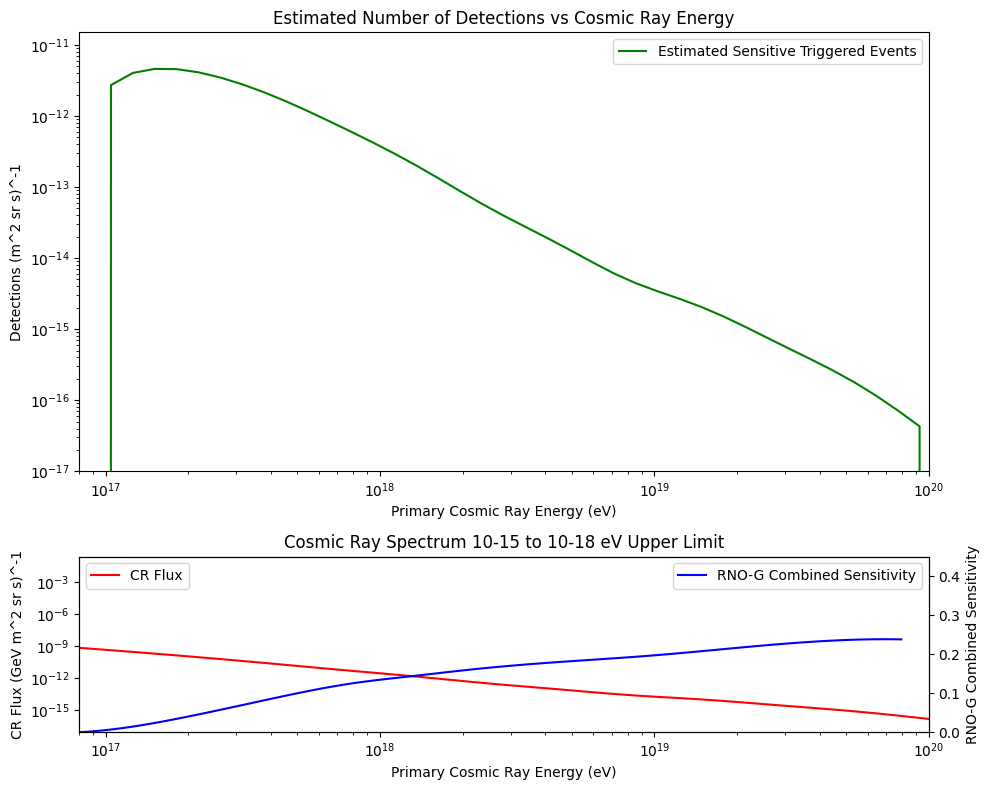

In [46]:
# plot the estimated number of events vs energy with the sensitivity curve and Cosmic Ray spectrum in a plot below
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2.5, 1]})
# plot estimated events
ax1.plot(flux_x, estimated_sensitive_triggered_events, label='Estimated Sensitive Triggered Events', color='green')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Primary Cosmic Ray Energy (eV)')
ax1.set_ylabel('Detections (m^2 sr s)^-1')
ax1.set_title('Estimated Number of Detections vs Cosmic Ray Energy')
# ax1.set_xlim(0.8*1e15, 1e18)
# ax1.set_xlim(0.8*1e15, 1e18)
ax1.set_xlim(0.8*1e17, 1e20)
ax1.set_ylim(1e-17,1.5e-11)

# ax1.set_ylim(1e-13,1e-6)
# ax1.grid(True, which='both', ls='--', lw=0.5)
# plot sensitivity and Cosmic Ray spectrum
# ax2.plot(data_eV[:, 0], data_eV[:, 1], label='CR Flux', color='red')
ax2.plot(x_interp_flux, y_smooth, label='CR Flux', color='red')
# ax2.set_xlim(0.8*1e15, 1e18)
ax2.set_xlim(0.8*1e17, 1e20)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(('Primary Cosmic Ray Energy (eV)'))
# ax2.set_ylabel('Cosmic Ray Energy Flux (cm^-2 s^-1)')
ax2.set_ylabel('CR Flux (GeV m^2 sr s)^-1')
ax2.set_title('Cosmic Ray Spectrum 10-15 to 10-18 eV Upper Limit')
# ax2.set_ylim(1e-13,1e-2)
# ax2.grid(True, which='both', ls='--', lw=0.5)
# twin axis for sensitivity
ax3 = ax2.twinx()
# ax3.plot(10 ** x_sensitivity, y_interp, label='RNO-G Sensitivity', color='blue')
# ax3.plot(10 ** x_trigger_eff, y_trigger_eff, label='RNO-G Sensitivity', color='blue')
# plot the sensitivity * trigger efficiency
ax3.plot(10 ** x_sensitivity, sensitivity_trigger_efficiency, label='RNO-G Combined Sensitivity', color='blue')
# ax3.set_xlim(0.8*1e
ax3.set_ylim(0, 0.45)
# ax3.set_yscale('log')
ax3.set_ylabel('RNO-G Combined Sensitivity')
# add legends
ax1.legend()
# ax2.legend(loc='upper right')
# ax3.legend(loc='right')
ax2.legend(loc='upper left')
ax3.legend(loc='upper right')
# ax2.legend()
# ax3.legend()
plt.tight_layout()

plt.savefig(f'Estimated Detections and Sensitivity.png', dpi=300)

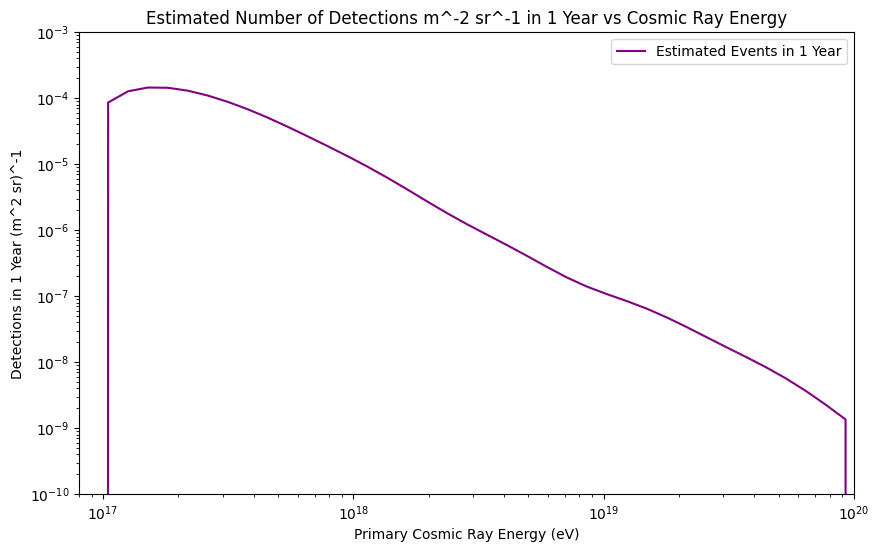

In [21]:
# plot the estimated number of events in a one year period
year = 365 * 24 * 3600  # seconds in a year
estimated_events_year = estimated_sensitive_triggered_events * year
plt.figure(figsize=(10, 6))
plt.plot(flux_x, estimated_events_year, label='Estimated Events in 1 Year', color='purple')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Primary Cosmic Ray Energy (eV)')
plt.ylabel('Detections in 1 Year (m^2 sr)^-1')
plt.title('Estimated Number of Detections m^-2 sr^-1 in 1 Year vs Cosmic Ray Energy')
plt.xlim(0.8*1e17, 1e20)
plt.ylim(1e-10,1e-3)

plt.legend()
plt.savefig(f'Estimated Detections in 1 Year vs Cosmic Ray Energy.png', dpi=300)

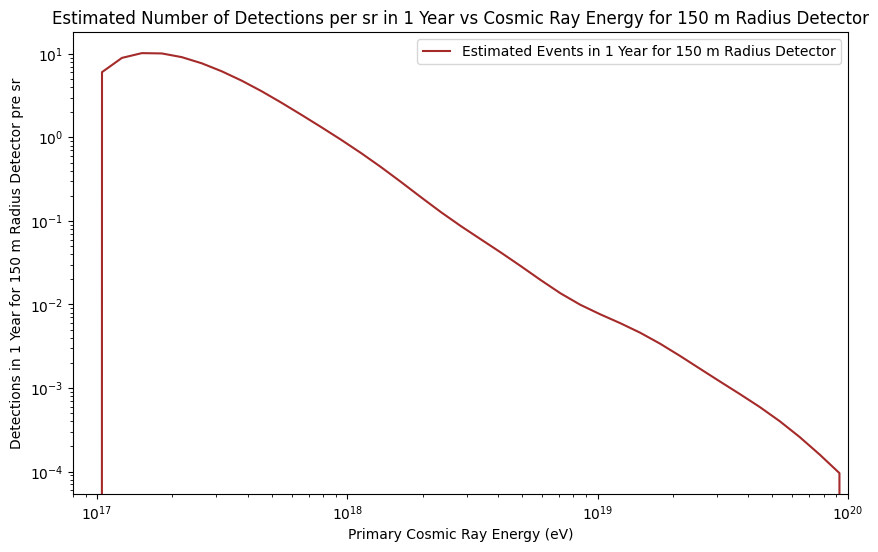

In [22]:
# detector radius 150 m
radius = 150  # m
area = np.pi * radius**2  # m^2

# plot the estimated number of events in a one year period for the detector area
estimated_events_year_area = estimated_events_year * area
plt.figure(figsize=(10, 6))
plt.plot(flux_x, estimated_events_year_area, label='Estimated Events in 1 Year for 150 m Radius Detector', color='brown')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Primary Cosmic Ray Energy (eV)')
plt.ylabel('Detections in 1 Year for 150 m Radius Detector pre sr')
plt.title('Estimated Number of Detections per sr in 1 Year vs Cosmic Ray Energy for 150 m Radius Detector')
plt.xlim(0.8*1e17, 1e20)
# plt.ylim(1e-8,1e-1)
plt.legend()
plt.savefig(f'Estimated Detections in 1 Year vs Cosmic Ray Energy for 150 m Radius Detector - log.png', dpi=300)

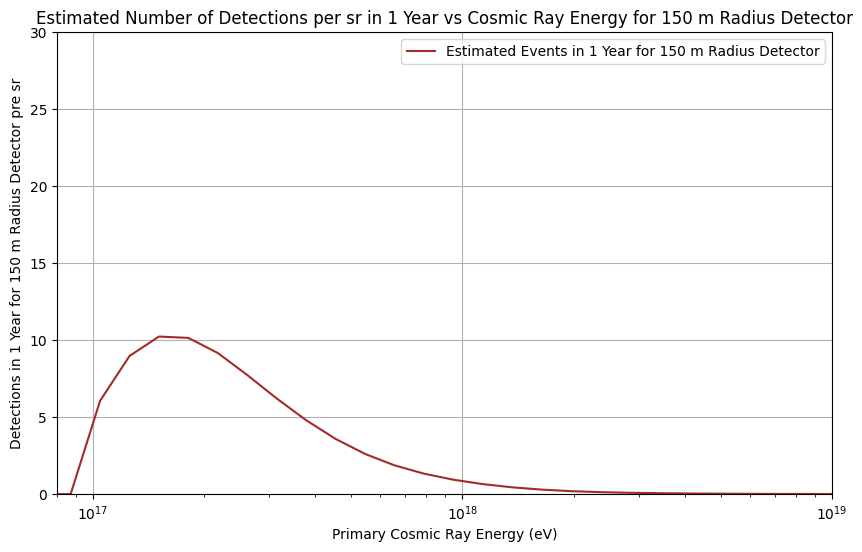

In [45]:
# detector radius 150 m
radius = 150  # m
area = np.pi * radius**2  # m^2

# plot the estimated number of events in a one year period for the detector area
estimated_events_year_area = estimated_events_year * area
plt.figure(figsize=(10, 6))
plt.plot(flux_x, estimated_events_year_area, label='Estimated Events in 1 Year for 150 m Radius Detector', color='brown')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Primary Cosmic Ray Energy (eV)')
plt.ylabel('Detections in 1 Year for 150 m Radius Detector pre sr')
plt.title('Estimated Number of Detections per sr in 1 Year vs Cosmic Ray Energy for 150 m Radius Detector')
plt.xlim(0.8*1e17, 1e19)
plt.ylim(0,30)
plt.grid()
plt.legend()
plt.savefig(f'Estimated Detections in 1 Year vs Cosmic Ray Energy for 150 m Radius Detector - linear.png', dpi=300)